# Exercise 1:
In this exercise you should implement everything including the tests (e.g. the chi-square and KS tests) yourself. Later, when your code is working you are free to use builtin functions.

## 1. 
Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.


In [168]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def LCG(n, a, c, M, seed):
    # Initialize the array to hold the generated numbers
    X = np.zeros(n)
    # Set the initial seed
    X[0] = seed
    # Generate the sequence
    for i in range(1, n):
        X[i] = (a * X[i-1] + c) % M
    return X

(a) Generate 10.000 (pseudo-) random numbers and present these numbers in a histogramme (e.g. 10 classes).

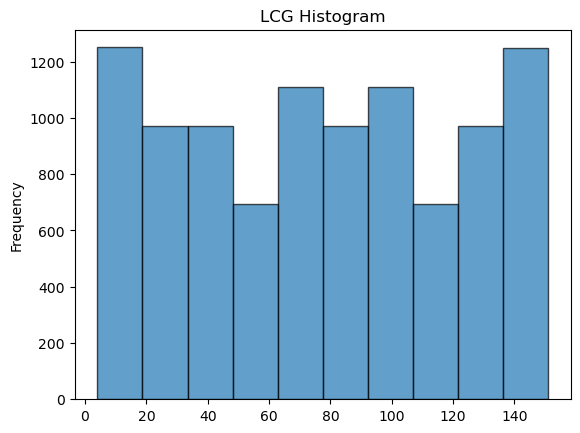

In [170]:
# Parameters
n = 10_000
a = 25
c = 1
M = 152
seed = 42

# Generate random numbers
rnd = LCG(n, a, c, M, seed)

plt.hist(rnd, bins=10, alpha=0.7, edgecolor='black')
plt.ylabel('Frequency')
plt.title('LCG Histogram')
plt.show()

(b) Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and
statistical tests - $\chi^2$, Kolmogorov-Smirnov, run-tests, and correlation test.

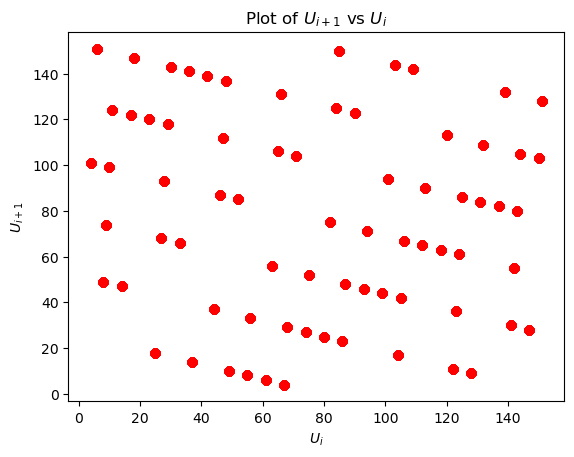

In [172]:
# Scatter plot  of U_i+1 versus U_i
plt.scatter(rnd[:-1], rnd[1:], marker='o', c='red')
plt.xlabel('$U_{i}$')
plt.ylabel('$U_{i+1}$')
plt.title('Plot of $U_{i+1}$ vs $U_{i}$')
plt.show()

In [200]:
# Chi-squared test

def chi_squared_test(rnd, classes):
    bins = np.linspace(0, 1, classes + 1)
    observed, _ = np.histogram(rnd, bins=bins)
    expected = np.full(classes, n / classes)
    
    chi_squared_stat = np.sum((observed - expected)**2 / expected)
    df = len(observed) - 1
    p_value = 1 - chi2.cdf(chi_squared_stat, df)
    return chi_squared_stat, p_value

classes = 10

chi_squared_stat, p_value = chi_squared_test(rnd, classes)

# Print results
print(f"Chi-squared test:")
print(f"Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Chi-squared test:
Statistic: 1000.0
P-value: 0.0


In [202]:
import numpy as np
from scipy.stats import norm

def kolmogorov_smirnov_test(rnd):
    sorted = np.sort(rnd)
    ecdf = np.cumsum(sorted)/len(rnd)
    
    exp_cdf = np.linspace(1/len(rnd), 1, len(rnd))
    
    D = np.max(np.abs(ecdf - exp_cdf))
    D_adjusted = (np.sqrt(n) + 0.12 + 0.11/np.sqrt(n)) * D
    
    # Calculate the p-value
    ks_p_value = 1 - norm.cdf(D_adjusted)

    return D_adjusted, p_value

D_adjusted, p_value = kolmogorov_smirnov_test(rnd)

# Output results
print(f"Kolmogorov-Smirnov test:")
print(f"Statistic: {D_adjusted}")
print(f"P-value: {p_value}")


Kolmogorov-Smirnov test:
Statistic: 2420.969414468207
P-value: 0.0
